# Homework

Merging compact objects produces a chirp signal in the gravitational wave detector.
Assume the chirp signal is 
\begin{equation}
y(t)=\begin{cases} sin(t^2) \quad 0<t<15 \\
0 \quad else\\
\end{cases}
\end{equation}

Please do wavelet transform to show the chirp signal is similar to the one you have seen
online. (Notice that the figure online has time as x-axis and frequency as the y-axis)
(You are welcome to use any wavelet you prefer.)



In [6]:
from numpy import *
 
ns=100
ntau=300
dstep=2.9/ns
sar=arange(0.101,3.001,dstep)
dtaustep=16./ntau
tauar=arange(0.,16.,dtaustep)
ystau=zeros((ntau, ns),complex)

nt=600
dtstep=15./nt
tar=arange(0.,15.,dtstep)


def func(t): 
    if (t>0 and t<15):
        y=sin(t**2)
    else:
        y=0
    return y

def morlet(t,sigma):
    psi=exp(2.*pi*t*1j)*exp(-t*t/2./sigma/sigma)
    return psi

yarr=zeros(nt)
def wavelet():     
    for idext in range(nt):
        yarr[idext]=func(tar[idext])
    for idextau in range(ntau):
        for idexs in range(ns):
            ystau[idextau,idexs]= sum(conjugate((1/sar[idexs]**(1/2))*morlet((tar-tauar[idextau])/sar[idexs],1)*yarr*dtstep))       
wavelet()
far=1./sar

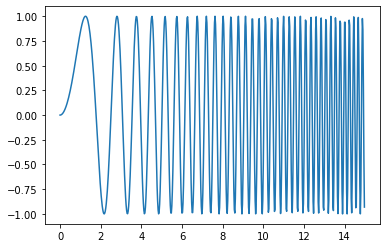

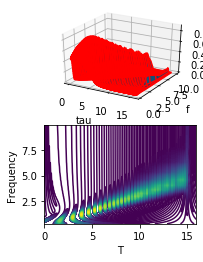

In [8]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pylab as p;

fig = p.figure()                                    
p.plot(tar,yarr)
fig = p.figure()  
ax = fig.add_subplot(2,2,1,projection='3d')
X, Y = p.meshgrid(tauar, far) 
ax.plot_surface(X, Y, abs(transpose(ystau)))                            
ax.plot_wireframe(X, Y, abs(transpose(ystau)), color = 'r')
ax.set_xlabel('tau')
ax.set_ylabel('f')
ax.set_zlabel('Y')
ax = fig.add_subplot(2,2,3)
levels=p.arange(abs(transpose(ystau)).min(),abs(transpose(ystau)).max(),(abs(transpose(ystau)).max() - abs(transpose(ystau)).min())/100.)
CS=p.contour(tauar,far,transpose(ystau).imag, levels=levels)
p.xlabel('T')
p.ylabel('Frequency')
p.show()
p.show()